In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotly.tools import make_subplots
import plotly.graph_objs as go
from datetime import datetime, date
from scipy import stats


from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss, average_precision_score, f1_score, precision_score,accuracy_score


import xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, plot_importance


In [2]:
vsd = pd.read_csv('vsd.csv')
vsd.head()
vsd


,_id,loan_amount,full_name,identity,phone,referal.aff_sub1,referal.aff_sub2,referal.aff_sub3,referal.aff_sub4,created_at,loan_status,rejected_by,product_code,city,district,dob,document.0,document.1,income,incomeType
0,6021491b3d402e687c544deb,5000000.0,Cù chính lợi,040090000634,989578404.0,${aff_sub1},${aff_sub2},${aff_sub3},${aff_sub4},2021-02-08T14:22:19.608Z,rejected,postback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,602145833d402e687c544dea,3000000.0,Nguyên thị thùy vien,27233652,365038715.0,I,${aff_sub2},${aff_sub3},${aff_sub4},2021-02-08T14:06:59.148Z,rejected,otp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6021419843f9e7280922e607,10000000.0,nguyên công hoàng,034202003640,374628840.0,${aff_sub1},${aff_sub2},${aff_sub3},${aff_sub4},2021-02-08T13:50:16.299Z,rejected,otp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6021410e43f9e7280922e606,10000000.0,Hồ văn thể,205677524,865351410.0,${aff_sub1},${aff_sub2},${aff_sub3},${aff_sub4},2021-02-08T13:47:58.959Z,rejected,postback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60213b9a3d402e687c544de9,50000000.0,Tôn Thị Hạnh mỹ,212646480,979814752.0,I,${aff_sub2},${aff_sub3},${aff_sub4},2021-02-08T13:24:42.526Z,rejected,otp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,6004d3db4c67df226b49cab6,20000000.0,Phạm văn thắng,031352803,917762305.0,vaysieude,BC,${aff_sub3},${aff_sub4},2021-01-18T00:18:35.372Z,rejected,postback,NaN,thanh_pho_hai_phong,thanh_pho_hai_phong:huyen_vinh_bao,07-05-1984,family_book,NaN,8000000.0,salaried
2785,6004d1dc4c67df226b49cab5,5000000.0,Nguyễn thị Minh,184412664,374233289.0,${aff_sub1},${aff_sub2},${aff_sub3},${aff_sub4},2021-01-18T00:10:04.779Z,rejected,otp,NaN,tinh_ha_tinh,tinh_ha_tinh:huyen_thach_ha,25-04-1998,family_book,nid_card,5000000.0,salaried
2786,6004d1c04c67df226b49cab4,20000000.0,Bùi văn tình,017190231,353681416.0,vaysieude,mail,${aff_sub3},${aff_sub4},2021-01-18T00:09:36.304Z,rejected,otp,NaN,thanh_pho_ha_noi,thanh_pho_ha_noi:huyen_dan_phuong,23-11-1992,nid_card,NaN,10000000.0,salaried
2787,6004d13f6721235b2914dd15,5000000.0,Hoàng Thị Ngọc,184380192,374233289.0,${aff_sub1},${aff_sub2},${aff_sub3},${aff_sub4},2021-01-18T00:07:27.531Z,rejected,otp,NaN,tinh_ha_tinh,tinh_ha_tinh:huyen_thach_ha,20-06-1999,family_book,nid_card,5000000.0,salaried


In [3]:
def label(columns):
    count =0
    mydict =dict()
    for c in vsd[columns].unique():
        mydict[c] = count
        count+=1
    return mydict

def label1(columns):
    for c in vsd.index:
        if vsd.loc[c,columns] !=0:
            vsd.loc[c,columns] = 1
    return vsd[columns]
    
def preprocess(columns):
    vsd[columns] = vsd[columns].str.lower()
    mlist = vsd[columns].unique()
    mdict= {}
    for dif in mlist:
        if (vsd[columns] == dif).sum() <100:
            mdict[dif] = 'other'
        else: mdict[dif] = dif
    vsd[columns] = vsd[columns].map(mdict)
    return 0

def get_age(row):
    try:
        row.dob = row.dob[-4:]
        row.dob = date.today().year - pd.to_numeric(row.dob)
    except:
        row.dob = 0
    return row
def re_age(row):
    if row.dob == 0:
        row.dob = np.ceil(vsd.dob.mode())
    return row

#loại bỏ row khi không có tên và khoản vay
vsd = vsd.dropna(subset = ['loan_amount','full_name'])

#loại bỏ nhưng feature không liên quan
drop_list = ['rejected_by','product_code','created_at','district','full_name','_id']
vsd = vsd.drop(drop_list, axis =1)

#loại bỏ row khi tình trạng là pending và label 0 với reject và 1 với success
vsd = vsd[vsd['loan_status']!= 'pending'] 
mdict = {'rejected':0, 'success':1}  
vsd['loan_status'] = vsd['loan_status'].map(mdict)

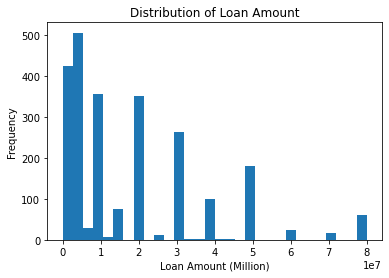

In [4]:
ax = plt.axes();
ax.hist(vsd.loan_amount, bins = 30);
ax.set(xlabel = 'Loan Amount (Million)',
      ylabel = 'Frequency',
      title = 'Distribution of Loan Amount');

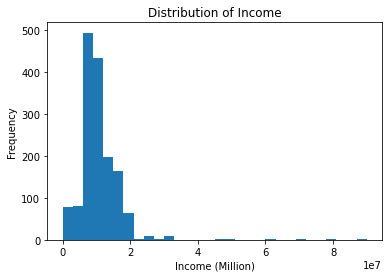

In [5]:
ax = plt.axes();
ax.hist(vsd.income, bins = 30);
ax.set(xlabel = 'Income (Million)',
      ylabel = 'Frequency',
      title = 'Distribution of Income');

<AxesSubplot:>

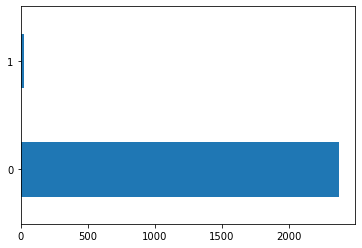

In [6]:
vsd.loan_status.value_counts().plot(kind = 'barh')

<AxesSubplot:>

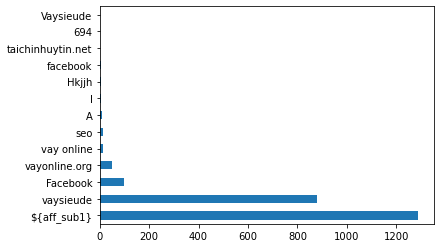

In [7]:
vsd['referal.aff_sub1'].value_counts().plot(kind = 'barh')


<AxesSubplot:>

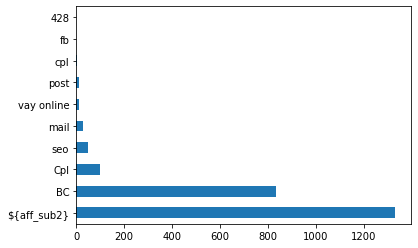

In [8]:
vsd['referal.aff_sub2'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

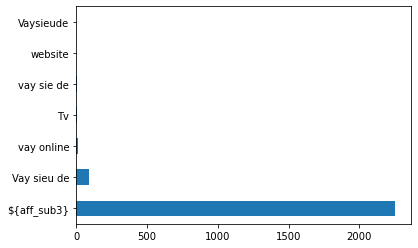

In [9]:
vsd['referal.aff_sub3'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

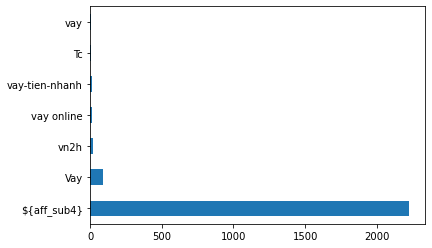

In [10]:
vsd['referal.aff_sub4'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

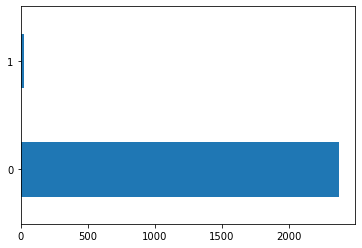

In [11]:
vsd['loan_status'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

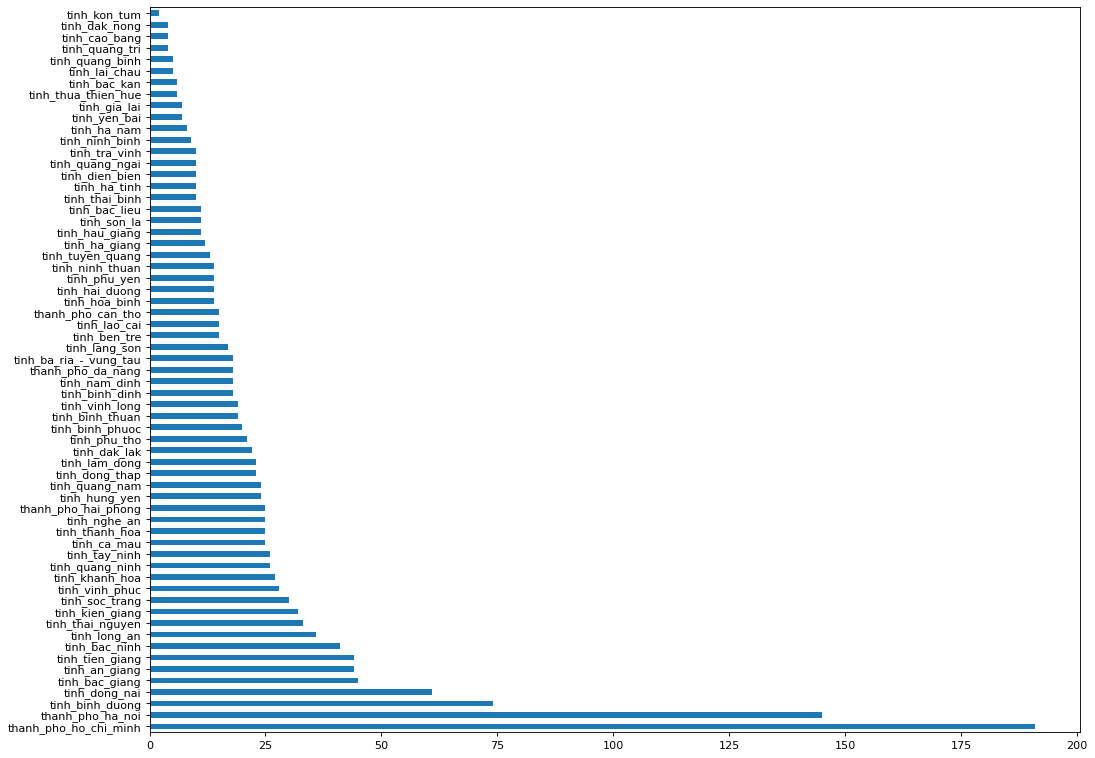

In [12]:
fig = plt.figure(figsize=(15, 12), dpi=80)
vsd['city'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

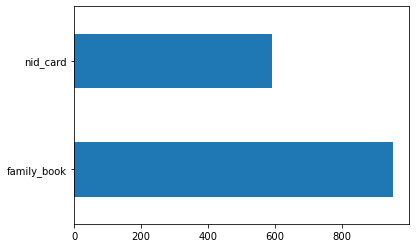

In [13]:
vsd['document.0'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

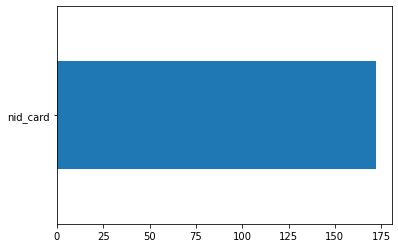

In [14]:
vsd['document.1'].value_counts().plot(kind = 'barh')

<AxesSubplot:>

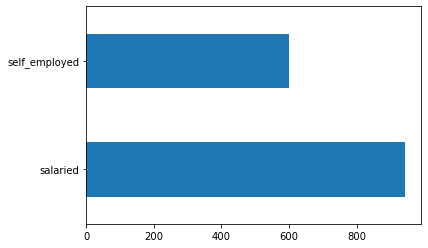

In [15]:
vsd['incomeType'].value_counts().plot(kind = 'barh')

In [16]:
vsd.isnull().sum()

loan_amount            0
identity               0
phone                  0
referal.aff_sub1      39
referal.aff_sub2      39
referal.aff_sub3      39
referal.aff_sub4      39
loan_status            0
city                 863
dob                  879
document.0           864
document.1          2234
income               863
incomeType           863
dtype: int64

In [17]:
preprocess_list = ['referal.aff_sub1','referal.aff_sub2','referal.aff_sub3','referal.aff_sub4']
# xử lí biến referal, với các value có tần suất < 100 thì gộp vào giá trị other cùng NA
for c in preprocess_list:
    vsd[c] = vsd[c].fillna('other')
    preprocess(c)
    vsd[c] = vsd[c].map(label(c))
    
vsd['city'] = vsd['city'].fillna(0)
vsd['city'] = vsd['city'].map(label('city'))

#label 1 khi có để lại số điện thoại cx như chứng minh thư và 0 khi ngược lại
vsd['identity'] = vsd['identity'].fillna(0)
vsd['identity'] = label1('identity')
vsd['phone'] = vsd['phone'].fillna(0)
vsd['phone'] = label1('phone').astype(int)

#fill na với giá trị 0 và label với các biến còn lại
vsd['document.0'].fillna(0)
vsd['document.0'] = vsd['document.0'].map(label('document.0'))
vsd['document.1'].fillna(0)
vsd['document.1'] = vsd['document.1'].map(label('document.1'))
vsd['income'] = vsd['income'].fillna(0)
vsd['incomeType'] = vsd['incomeType'].fillna(0)
vsd['incomeType'] = vsd['incomeType'].map(label('incomeType'))

#dob sẽ được tính thành tuổi, với những giá trị không hợp lệ hoặc na sẽ đổi thành mode
vsd = vsd.apply(get_age,axis = 'columns')
vsd = vsd.apply(re_age,axis = 'columns')

#khả năng hoàn trả payback được tính bằng loan amount / income và làm tròn lên, với income = 0 thì payback = 0
vsd['payback'] = vsd['loan_amount']/vsd['income']
for c in vsd.index:
    if vsd.loc[c,'payback'] == float('inf') :
        vsd.loc[c,'payback'] = 0
vsd['payback'] = vsd.payback.apply(np.ceil)

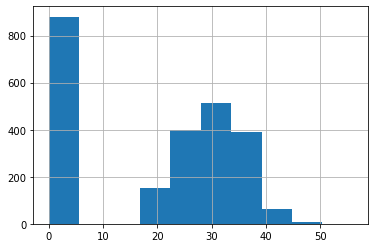

In [18]:
vsd.dob.hist();

In [19]:
pd.crosstab(vsd['referal.aff_sub1'], vsd.loan_status)

loan_status,0.0,1.0
referal.aff_sub1,,
0.0,1276,13
1.0,136,2
2.0,865,13
3.0,101,0


In [20]:
pd.crosstab(vsd['referal.aff_sub2'], vsd.loan_status)

loan_status,0.0,1.0
referal.aff_sub2,,
0.0,1314,15
1.0,142,1
2.0,102,0
3.0,820,12


In [21]:
pd.crosstab(vsd['referal.aff_sub3'], vsd.loan_status)

loan_status,0.0,1.0
referal.aff_sub3,,
0.0,2224,28
1.0,154,0


In [22]:
pd.crosstab(vsd['referal.aff_sub4'], vsd.loan_status)

loan_status,0.0,1.0
referal.aff_sub4,,
0.0,2197,27
1.0,181,1


In [23]:
pd.crosstab(vsd['document.0'], vsd.loan_status)

loan_status,0.0,1.0
document.0,,
0.0,855,9
1.0,583,7
2.0,940,12


In [24]:
pd.crosstab(vsd['document.1'], vsd.loan_status)

loan_status,0.0,1.0
document.1,,
0.0,2209,25
1.0,169,3


In [25]:
pd.crosstab(vsd['incomeType'], vsd.loan_status)

loan_status,0.0,1.0
incomeType,,
0.0,854,9
1.0,931,13
2.0,593,6


In [26]:

X = vsd.drop(['loan_status','identity','phone'], axis = 1)
y = vsd['loan_status']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.7, random_state = 123)
X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)


In [27]:
def calculateChiSquare(catVariable, targetCatVariable=y_train):
    catGroupedByCatTarget = pd.crosstab(index = catVariable, columns = targetCatVariable)
    testResult = stats.chi2_contingency(catGroupedByCatTarget)
    print(f"Chi Square Test Result between {targetCatVariable.name} & {catVariable.name}:")
    return print(testResult)

In [28]:
calculateChiSquare(X_train['incomeType'])

Chi Square Test Result between loan_status & incomeType:
(0.5546349684151244, 0.7578138649796762, 2, array([[258.82801664,   2.17198336],
       [269.73647712,   2.26352288],
       [186.43550624,   1.56449376]]))


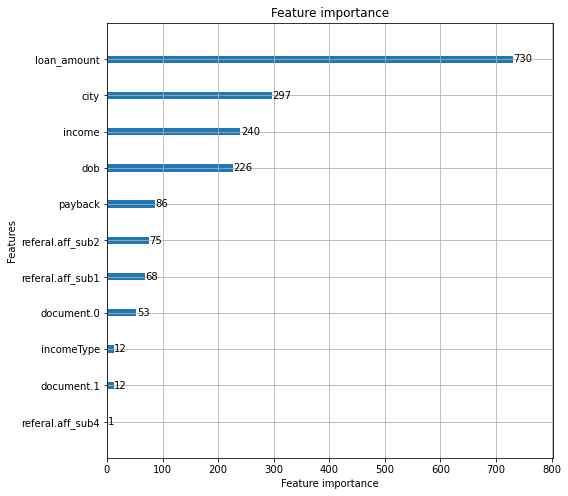

In [29]:
LGB_train = LGBMClassifier(random_state=42)
LGB_train.fit(X_train, y_train)
plot_importance(LGB_train, figsize=(8, 8));

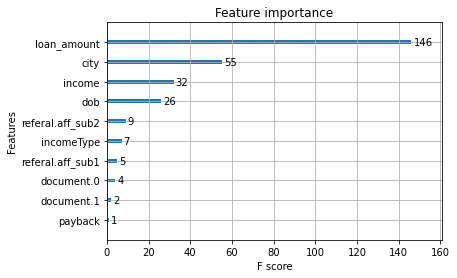

In [30]:
XGB_train= XGBClassifier(use_label_encoder=False, verbosity = 0)
XGB_train.fit(X_train, y_train)
xgboost.plot_importance(XGB_train);

In [31]:
importance_feature = ['loan_amount','income','dob','city','payback']
X_valid_importance = X_valid[importance_feature]

In [32]:


def get_score(model, X_train, X_valid, y_train, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    return f1_score(y_valid,y_pred)

def print_score(X,y):
    k=10
    folds = StratifiedKFold(k)
    acc_score_LGB = []
    acc_score_XGB = []
    acc_score_lr = []
    acc_score_dt = []
    acc_score_rf = []
    for train_index, valid_index in folds.split(X,y):
        X_train , X_valid = X.iloc[train_index,:],X.iloc[valid_index,:]
        y_train , y_valid = y[train_index] , y[valid_index]
        acc_score_LGB.append(get_score(LGBMClassifier(random_state=42), X_train , X_valid, y_train , y_valid))
        acc_score_XGB.append(get_score(XGBClassifier(use_label_encoder=False, verbosity = 0), X_train , X_valid, y_train , y_valid))
        acc_score_lr.append(get_score(LogisticRegression(), X_train , X_valid, y_train , y_valid))
        acc_score_dt.append(get_score(DecisionTreeClassifier(), X_train , X_valid, y_train , y_valid))
        acc_score_rf.append(get_score(RandomForestClassifier(), X_train , X_valid, y_train , y_valid))

    print('Light Gradient Boosted Machine:')
    avg = sum(acc_score_LGB)
    print(avg)

    print('eXtreme Gradient Boosting:')
    avg = sum(acc_score_XGB)
    print(avg)

    print('Logistic Regression:')
    avg = sum(acc_score_lr)
    print(avg)

    print('Decision Tree Classifier:')
    avg = sum(acc_score_dt)
    print(avg)

    print('Random Forest Classifier:')
    avg = sum(acc_score_rf)
    print(avg)
    return 0

In [33]:
print_score(X_valid,y_valid)

Light Gradient Boosted Machine:
0.0
eXtreme Gradient Boosting:
0.0
Logistic Regression:
0.0
Decision Tree Classifier:
0.0
Random Forest Classifier:
0.0


0

In [34]:
print_score(X_valid_importance,y_valid)

Light Gradient Boosted Machine:
0.0
eXtreme Gradient Boosting:
0.0
Logistic Regression:
0.0
Decision Tree Classifier:
0.0
Random Forest Classifier:
0.0


0